## Bullying in schools ##

#### This is a survey of adolescents about factors that are related to bullying ####


### About Dataset ###

The Global School-Based Student Health Survey (GSHS) is a school-based survey which uses a self-administered questionnaire to obtain data on young people's health behaviour and protective factors related to the leading causes of morbidity and mortality.
The survey was conducted in Argentina in 2018.A total of 56,981 students participated.
The school response rate was 86%, the student response rate was 74%, and the overall response rate was 63%.

About the development of a bullying prediction model

From the GHSH, the survey questions related to bullying were selected. This is with the aim of developing a model that allows preventing it.
Some of the indicators of bullying have been related to feelings of loneliness, lack of close friends, poor communication with parents, absence from classes. (eg. Nansel et al Bullying behaviors among US youth: Prevalence and association with psychosocial adjustment)
Likewise, young people identified by bullies as underweight, overweight and obese have been bullied.

#### Selected variables ####

- Bullied on school property in past 12 months
- Bullied not on school property in past 12_months
- Cyber bullied in past 12 months
- Custom Age
- Sex
- Physically attacked
- Physical fighting
- Felt lonely
- Close friends
- Miss school no permission
- Other students kind and helpful
- Parents understand problems
- Most of the time or always felt lonely
- Missed classes or school without permission
- Were underweight
- Were overweight
- Were obese

#### Objective ####

Develop a model that allows predicting bullying based on the variables selected from the Global School-Based Student Health Survey.

https://www.kaggle.com/datasets/leomartinelli/bullying-in-schools

In [458]:
import pandas as pd

import numpy as np

import matplotlib.pylab as plt

import seaborn as sns

import math

from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

# For tuning the model
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [459]:
# open zip file and read csv
data = pd.read_csv("archive.zip")

data.head()

,record;Bullied_on_school_property_in_past_12_months;Bullied_not_on_school_property_in_past_12_months;Cyber_bullied_in_past_12_months;Custom_Age;Sex;Physically_attacked;Physical_fighting;Felt_lonely;Close_friends;Miss_school_no_permission;Other_students_kind_and_helpful;Parents_understand_problems;Most_of_the_time_or_always_felt_lonely;Missed_classes_or_school_without_permission;Were_underweight;Were_overweight;Were_obese
0,1;Yes;Yes; ;13 years old;Female;0 times;0 time...
1,2;No;No;No;13 years old;Female;0 times;0 times...
2,3;No;No;No;14 years old;Male;0 times;0 times;N...
3,4;No;No;No;16 years old;Male;0 times;2 or 3 ti...
4,5;No;No;No;13 years old;Female;0 times;0 times...


In [460]:
# get column names
original_cols = data.columns[0].split(';')

In [461]:
# copy df
df = data.copy()

# create new columns
df = df.reindex(columns=original_cols)

df.shape

(56981, 18)

In [462]:
# extract entries from rows of df
# save as structured data in new df

for index, row in data.iterrows():
    df.loc[index] = row[0].split(';')

df.head()

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,Yes,Yes,,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,,,
1,2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,,,
2,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
3,4,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,,No,No,No,No,No
4,5,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,,,


In [463]:
# replace empty spaces with NaN
df[df.columns] = df[df.columns].apply(lambda x: x.str.strip()).replace('', np.nan)

In [464]:
# shorten column names

col_dict = {
    'Bullied_on_school_property_in_past_12_months':'Bullied_school',
    'Bullied_not_on_school_property_in_past_12_months':'Bullied_outside',
    'Cyber_bullied_in_past_12_months':'Bullied_cyber',
    'Miss_school_no_permission':'Days_missed',
    'Other_students_kind_and_helpful':'Others_kind',
    'Parents_understand_problems':'Parents_understand',
    'Most_of_the_time_or_always_felt_lonely':'Always_lonely',
    'Missed_classes_or_school_without_permission':'Absent',
    'Were_underweight':'Underweight',
    'Were_overweight':'Overweight',
    'Were_obese':'Obese'}
df = df.rename(columns=col_dict)

In [465]:
df['Bullied'] = (df['Bullied_school'] == 'Yes') | (df['Bullied_outside'] == 'Yes') | (df['Bullied_cyber'] == 'Yes')
df['Bullied'] = df['Bullied'].astype(int)

In [466]:
df.drop('record', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Bullied_school       55742 non-null  object
 1   Bullied_outside      56492 non-null  object
 2   Bullied_cyber        56410 non-null  object
 3   Custom_Age           56873 non-null  object
 4   Sex                  56445 non-null  object
 5   Physically_attacked  56741 non-null  object
 6   Physical_fighting    56713 non-null  object
 7   Felt_lonely          56615 non-null  object
 8   Close_friends        55905 non-null  object
 9   Days_missed          55117 non-null  object
 10  Others_kind          55422 non-null  object
 11  Parents_understand   54608 non-null  object
 12  Always_lonely        56615 non-null  object
 13  Absent               55117 non-null  object
 14  Underweight          36052 non-null  object
 15  Overweight           36052 non-null  object
 16  Obes

In [467]:
(df.isnull().sum() / df.shape[0])*100

Bullied_school          2.174409
Bullied_outside         0.858181
Bullied_cyber           1.002088
Custom_Age              0.189537
Sex                     0.940664
Physically_attacked     0.421193
Physical_fighting       0.470332
Felt_lonely             0.642319
Close_friends           1.888349
Days_missed             3.271266
Others_kind             2.736000
Parents_understand      4.164546
Always_lonely           0.642319
Absent                  3.271266
Underweight            36.729787
Overweight             36.729787
Obese                  36.729787
Bullied                 0.000000
dtype: float64

In [468]:
df['Bullied'].sum() / df['Bullied'].count()

0.40034397430722524

## Univariate Data Analysis ##

In [469]:
for i in df.columns:
    print(df[i].value_counts(normalize = True))
    
    print('*' * 40)

No     0.786463
Yes    0.213537
Name: Bullied_school, dtype: float64
****************************************
No     0.783527
Yes    0.216473
Name: Bullied_outside, dtype: float64
****************************************
No     0.783779
Yes    0.216221
Name: Bullied_cyber, dtype: float64
****************************************
14 years old               0.227630
15 years old               0.225274
16 years old               0.206390
13 years old               0.185923
17 years old               0.144656
18 years old or older      0.006734
12 years old               0.002550
11 years old or younger    0.000844
Name: Custom_Age, dtype: float64
****************************************
Female    0.520188
Male      0.479812
Name: Sex, dtype: float64
****************************************
0 times             0.828272
1 time              0.092490
2 or 3 times        0.042386
12 or more times    0.013923
4 or 5 times        0.012249
6 or 7 times        0.005322
8 or 9 times        0.003331


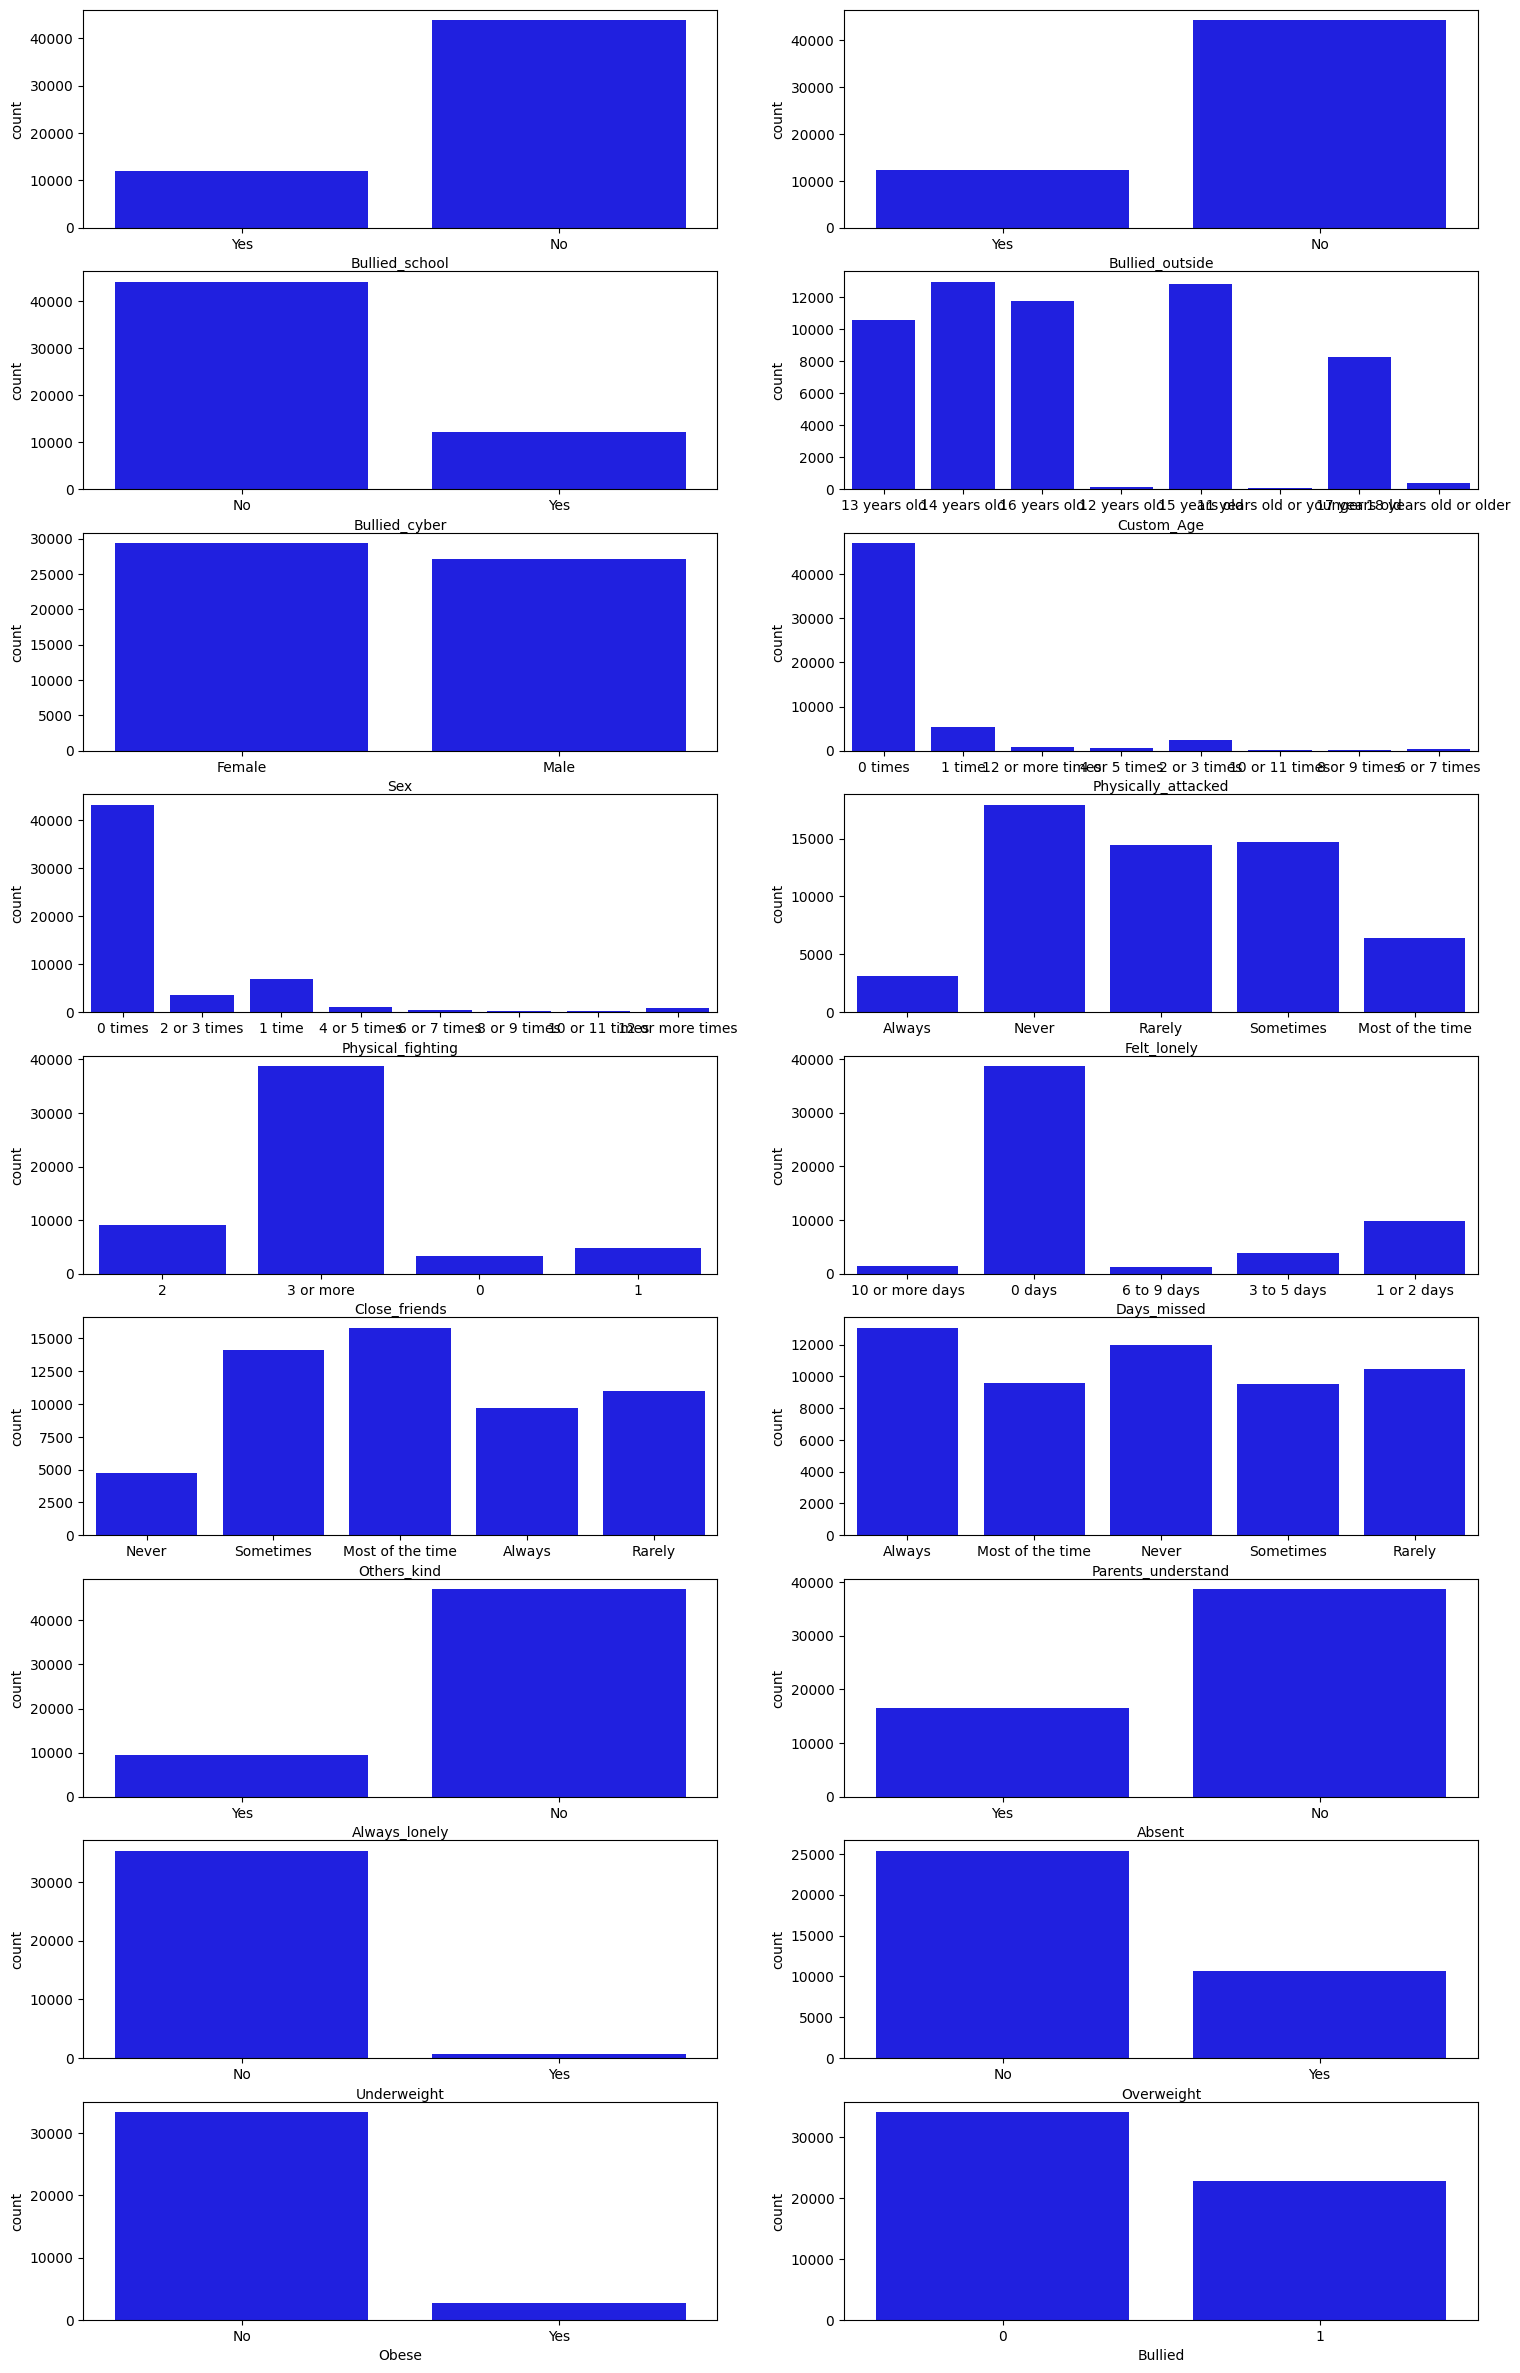

In [470]:
# number of rows of bar plots
plot_rows = math.ceil(len(df.columns)/2)

# plots layout
fig, axes = plt.subplots(plot_rows, 2, figsize = (18, 30))

# plots layout title
#fig.suptitle('Bar plot for all categorical variables in the dataset')

for ix, feature in enumerate(df.columns):
    row = math.floor(ix / 2)
    col = ix % 2

    sns.countplot(ax = axes[row, col], x = feature, data = df, color = 'blue');

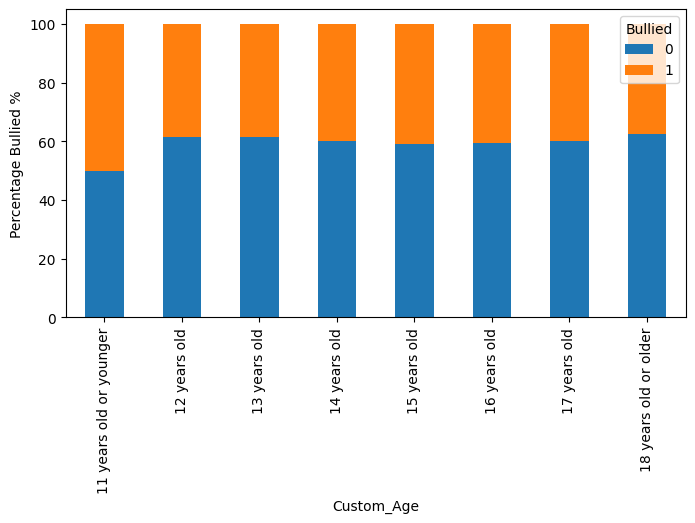

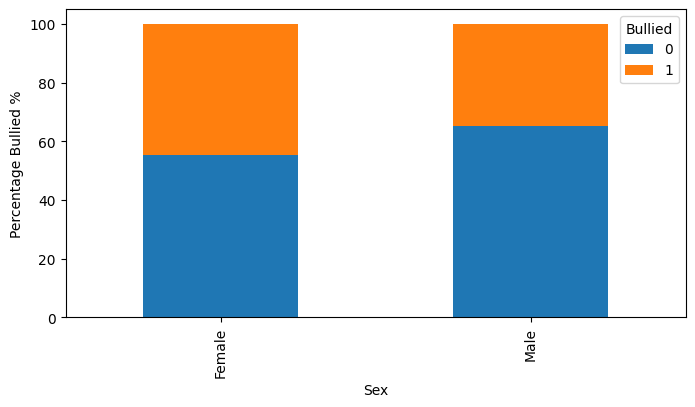

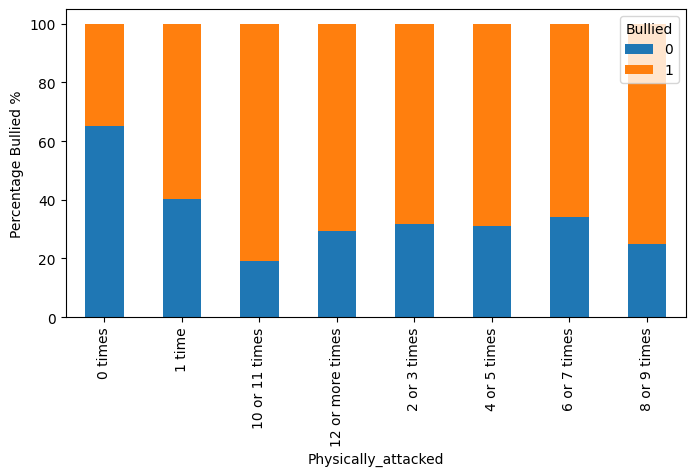

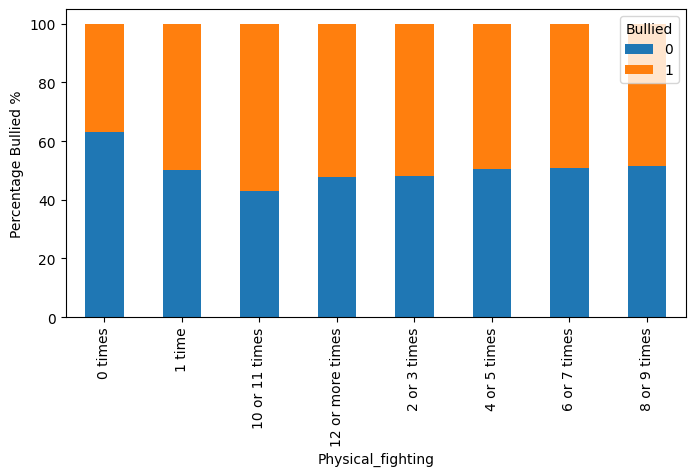

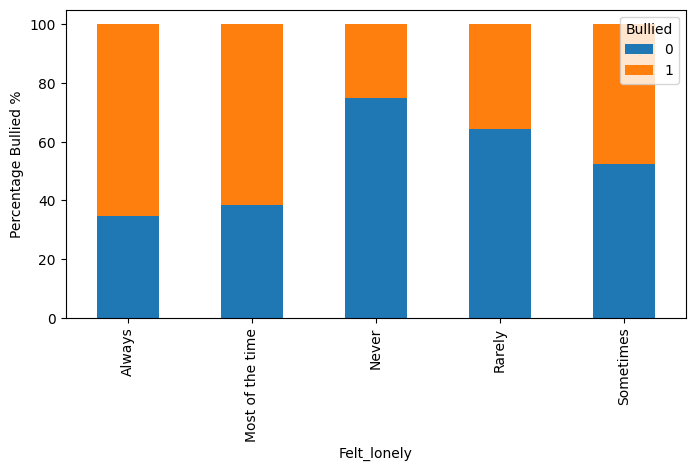

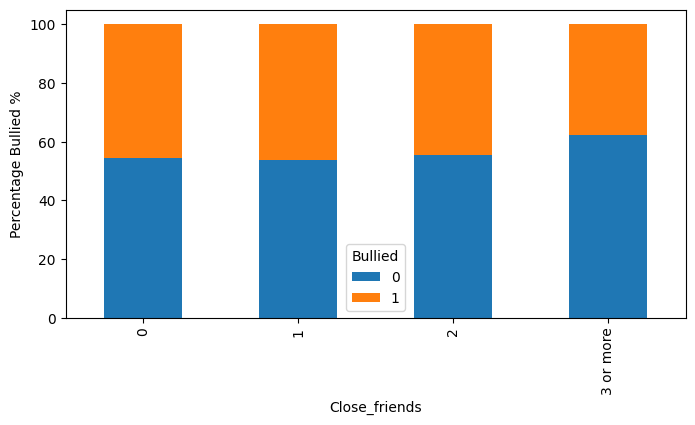

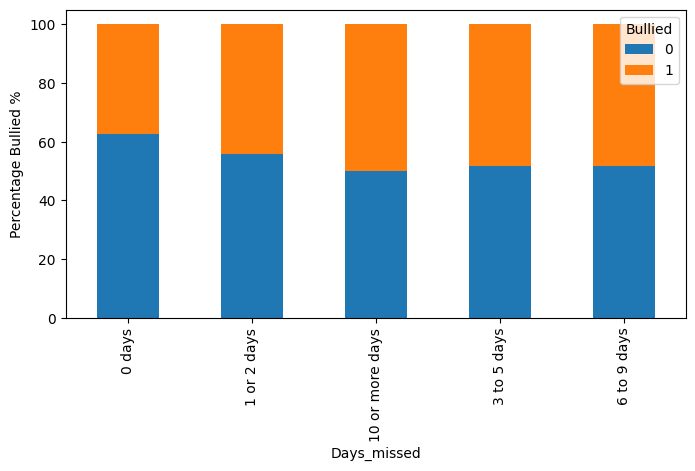

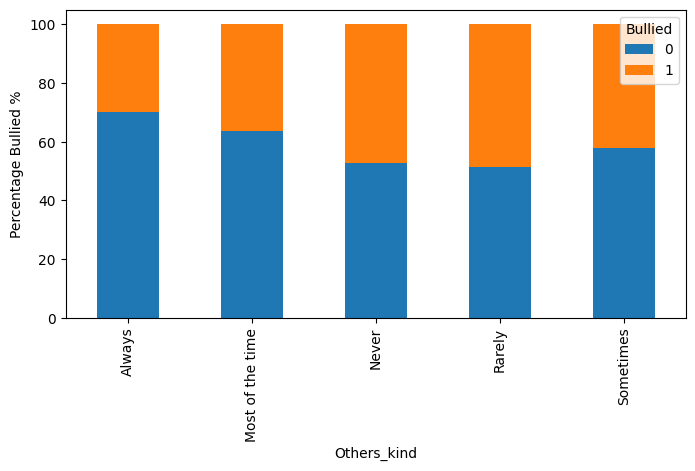

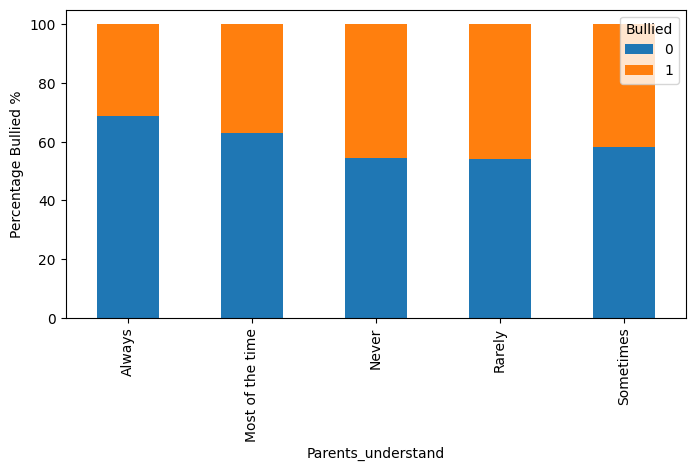

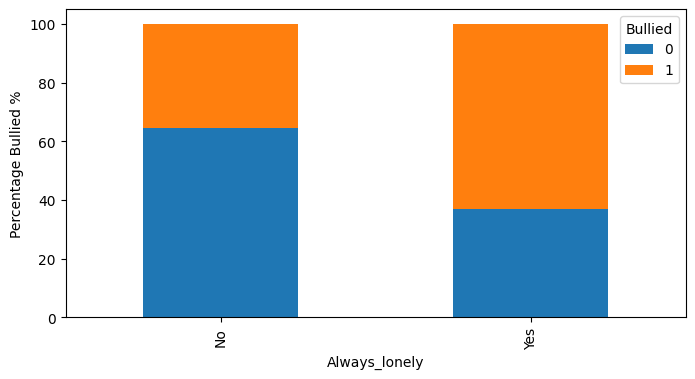

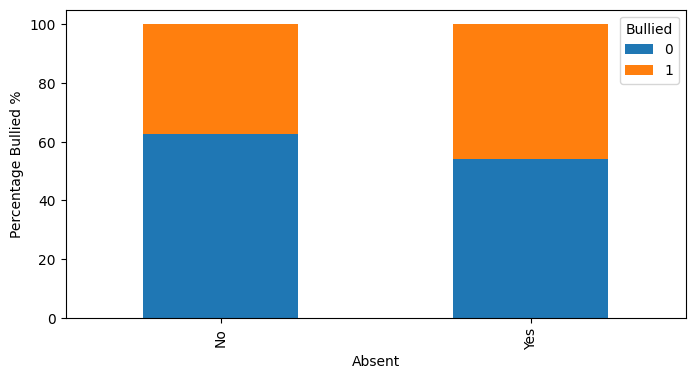

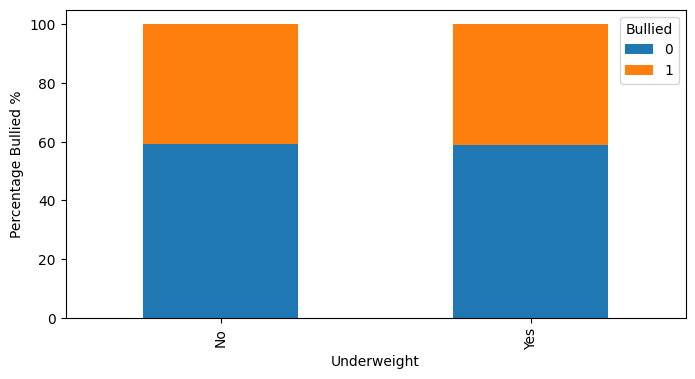

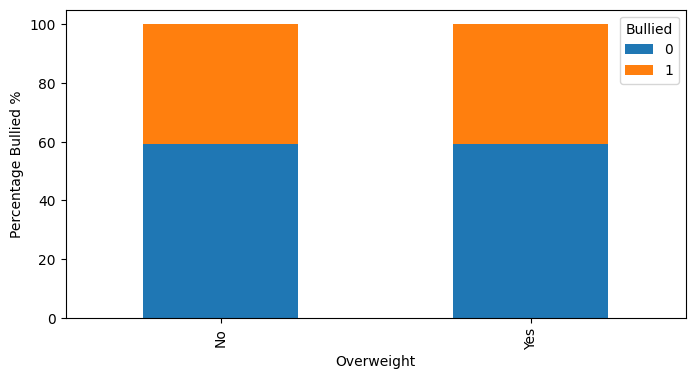

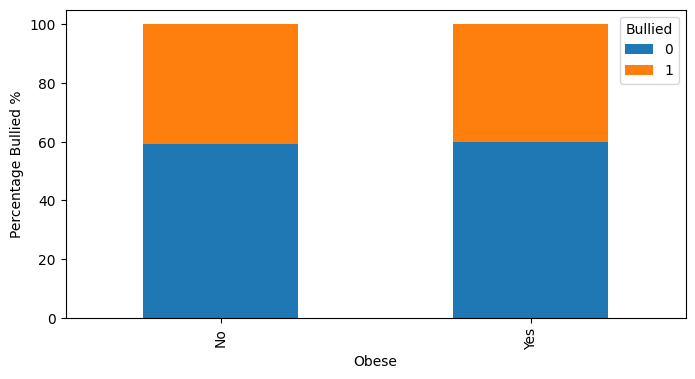

In [489]:
feature_cols = [e for e in df.columns if e not in ('Bullied_school', 'Bullied_outside', 'Bullied_cyber', 'Bullied')]

for i in feature_cols:
    if i != 'Bullied':
        (pd.crosstab(df[i], df['Bullied'], normalize = 'index')*100).plot(kind = 'bar', figsize = (8, 4), stacked = True)
        plt.ylabel('Percentage Bullied %')

In [472]:
def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Bullied', 'Bullied'], yticklabels = ['Not Bullied', 'Bullied'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')
    
    plt.show()

In [473]:
# We are removing the 'Bullied_' outcome variable from the feature set
df_features = df.drop(['Bullied', 'Bullied_school', 'Bullied_outside', 'Bullied_cyber'], axis = 1)

# And then we are extracting the outcome variable separately
df_target = df['Bullied']
df_features.head()

,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Days_missed,Others_kind,Parents_understand,Always_lonely,Absent,Underweight,Overweight,Obese
0,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,NaN,NaN,NaN
1,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,NaN,NaN,NaN
2,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
3,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,NaN,No,No,No,No,No
4,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,NaN,NaN,NaN


In [474]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Custom_Age           56873 non-null  object
 1   Sex                  56445 non-null  object
 2   Physically_attacked  56741 non-null  object
 3   Physical_fighting    56713 non-null  object
 4   Felt_lonely          56615 non-null  object
 5   Close_friends        55905 non-null  object
 6   Days_missed          55117 non-null  object
 7   Others_kind          55422 non-null  object
 8   Parents_understand   54608 non-null  object
 9   Always_lonely        56615 non-null  object
 10  Absent               55117 non-null  object
 11  Underweight          36052 non-null  object
 12  Overweight           36052 non-null  object
 13  Obese                36052 non-null  object
dtypes: object(14)
memory usage: 6.1+ MB


In [475]:
unknown_cols = ['Custom_Age', 'Sex', 'Physically_attacked', 'Physical_fighting', 'Felt_lonely', 'Close_friends', 'Days_missed', 'Others_kind', 'Parents_understand', 'Always_lonely', 'Absent', 'Underweight', 'Overweight', 'Obese']

df_features[unknown_cols] = df_features[unknown_cols].fillna('Unknown')

In [476]:
# Creating dummy variables for the categorical variables
df_features = pd.get_dummies(df_features, drop_first = True)

df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 60 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Custom_Age_12 years old               56981 non-null  uint8
 1   Custom_Age_13 years old               56981 non-null  uint8
 2   Custom_Age_14 years old               56981 non-null  uint8
 3   Custom_Age_15 years old               56981 non-null  uint8
 4   Custom_Age_16 years old               56981 non-null  uint8
 5   Custom_Age_17 years old               56981 non-null  uint8
 6   Custom_Age_18 years old or older      56981 non-null  uint8
 7   Custom_Age_Unknown                    56981 non-null  uint8
 8   Sex_Male                              56981 non-null  uint8
 9   Sex_Unknown                           56981 non-null  uint8
 10  Physically_attacked_1 time            56981 non-null  uint8
 11  Physically_attacked_10 or 11 times    569

In [477]:
(X_train, X_test, y_train, y_test) = train_test_split(df_features, df_target, test_size = .2, random_state = 22)

## Logistic Regression ##

In [478]:
# Fitting the logistic regression model
lg = LogisticRegression()

lg.fit(X_train,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.69      0.84      0.75     27419
           1       0.63      0.42      0.50     18165

    accuracy                           0.67     45584
   macro avg       0.66      0.63      0.63     45584
weighted avg       0.66      0.67      0.66     45584



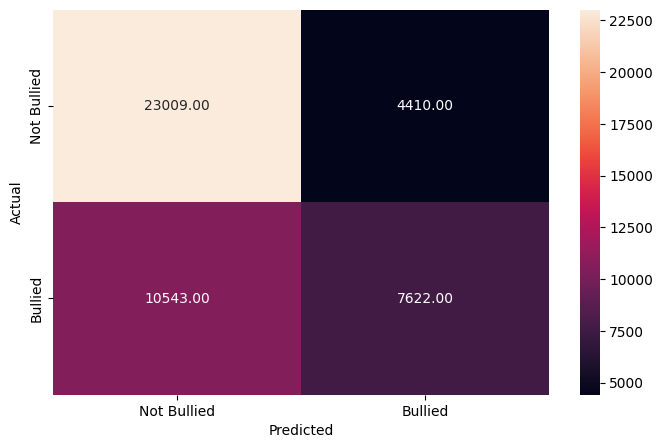

In [479]:
# Checking the performance on the training data
y_pred_train = lg.predict(X_train)
\]
metrics_score(y_train, y_pred_train)

The recall score on 'Bullied' is very low at 0.42.
10.5k students who were bullied were predicted as 'Not Bullied' which misses out on a chance for intervention.

              precision    recall  f1-score   support

           0       0.68      0.84      0.75      6750
           1       0.64      0.42      0.51      4647

    accuracy                           0.67     11397
   macro avg       0.66      0.63      0.63     11397
weighted avg       0.66      0.67      0.65     11397



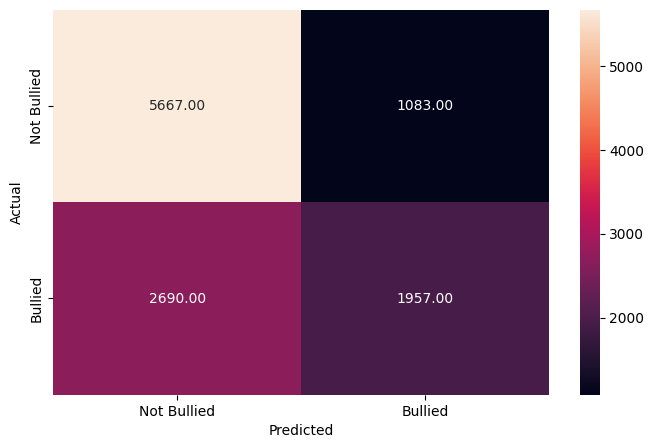

In [480]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test)
metrics_score(y_test, y_pred_test)

**Let's check the coefficients and find which variables are leading to attrition and which can help to reduce the attrition.**

In [482]:
# Printing the coefficients of logistic regression
cols = df_features.columns

coef_lg = lg.coef_

pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)

,0
Physically_attacked_10 or 11 times,1.560110
Physically_attacked_8 or 9 times,1.250997
Physically_attacked_12 or more times,1.080963
Physically_attacked_2 or 3 times,1.079300
Physically_attacked_4 or 5 times,1.058256
Physically_attacked_6 or 7 times,0.885145
Physically_attacked_1 time,0.819418
Always_lonely_Yes,0.676973
Others_kind_Rarely,0.450285
Others_kind_Never,0.407920


The coefficients of the logistic regression model give us the log of odds, which is hard to interpret in the real world. We can convert the log of odds into odds by taking its exponential.

In [484]:
odds = np.exp(lg.coef_[0]) # Finding the odds

# Adding the odds to a DataFrame and sorting the values
pd.DataFrame(odds, X_train.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False) 

,odds
Physically_attacked_10 or 11 times,4.759342
Physically_attacked_8 or 9 times,3.493824
Physically_attacked_12 or more times,2.947515
Physically_attacked_2 or 3 times,2.942620
Physically_attacked_4 or 5 times,2.881343
Physically_attacked_6 or 7 times,2.423336
Physically_attacked_1 time,2.269180
Always_lonely_Yes,1.967912
Others_kind_Rarely,1.568759
Others_kind_Never,1.503687


**The Precision-Recall Curve for Logistic Regression**

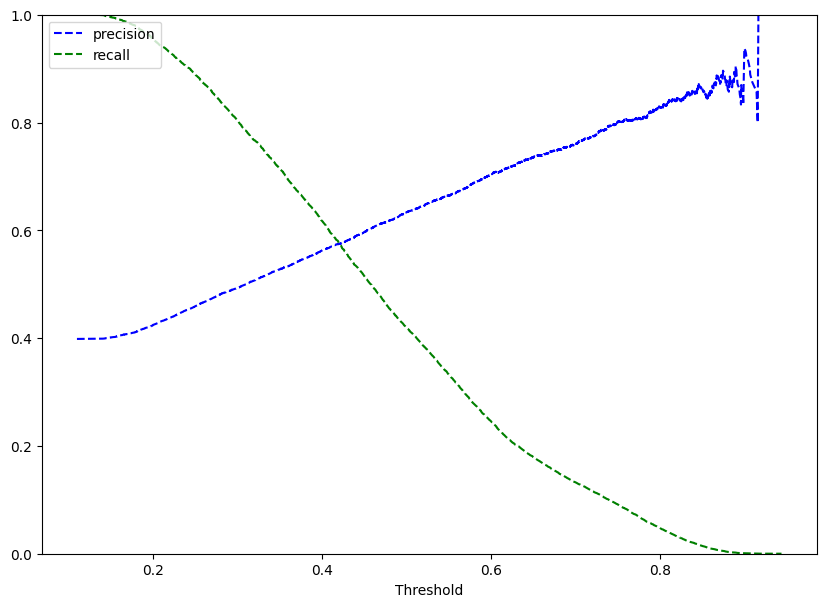

In [485]:
y_scores_lg = lg.predict_proba(X_train) # predict_proba gives the probability of each observation belonging to each class


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

**Observation:**
- We can see that the precision and the recall are balanced for a threshold of about **0.42**.

**Let's find out the performance of the model at this threshold.**

              precision    recall  f1-score   support

           0       0.72      0.72      0.72     27419
           1       0.57      0.58      0.58     18165

    accuracy                           0.66     45584
   macro avg       0.65      0.65      0.65     45584
weighted avg       0.66      0.66      0.66     45584



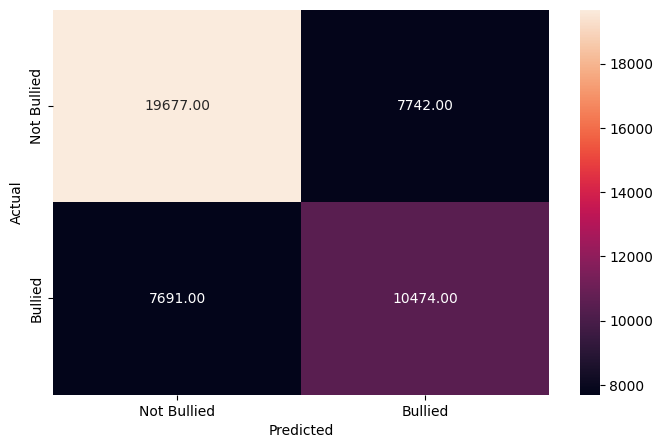

In [487]:
optimal_threshold1 = .42

y_pred_train = lg.predict_proba(X_train)

metrics_score(y_train, y_pred_train[:, 1] > optimal_threshold1)

- The f1-score for 'Bullied' improved from 0.5 to 0.58. 
- Precision for class 'Bullied' dropped some but recall improved significantly.
- The overall accuracy dropped by 0.1.

              precision    recall  f1-score   support

           0       0.74      0.57      0.64      6750
           1       0.53      0.71      0.61      4647

    accuracy                           0.63     11397
   macro avg       0.64      0.64      0.63     11397
weighted avg       0.66      0.63      0.63     11397



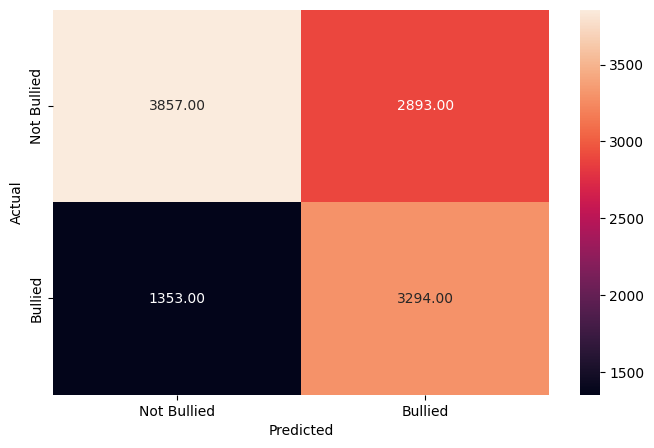

In [488]:
optimal_threshold1 = .35

y_pred_test = lg.predict_proba(X_test)

metrics_score(y_test, y_pred_test[:, 1] > optimal_threshold1)

- The accuracy on the test data dropped by a few points suggesting there is some overfitting in the model.
- The recall of the test data has increased while at the same time, the precision has decreased slightly, which is to be expected while adjusting the threshold.